Top 10 Python Packages:


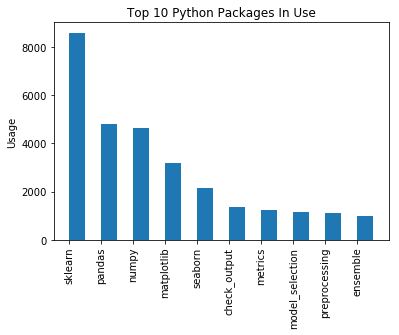

In [2]:
#/usr/bin/python
 
import sqlite3
from sqlite3 import Error
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
 
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

def select_all_packages(conn):
    """
    Query all packages in the tasks table
    :param conn: the Connection object
    :return:
    """
    cur = conn.cursor()
    cur.execute("""SELECT packages FROM 'kernels_location' 
                left join 'kernels_base' on kernels_location.id = kernels_base.id
                where languageName = 'Python'
                and packages <> ''""")
 
    rows = cur.fetchall()
    listOfPackages = []
    for row in rows:
        pList = str(row)
        wordList = re.sub("[^\w]", " ",  pList).split()
        for item in wordList:
            listOfPackages.append(item)
    return listOfPackages

def plot_top_10_packages(listOfPackages):
    countOfPackages = {}
    countOfPackages = Counter(listOfPackages).most_common(10)
    df = pd.DataFrame(countOfPackages, columns=['PackageName', 'Occurence'])
    y_pos = np.arange(len(df.PackageName))
    plt.bar(y_pos, df.Occurence, align='edge', width=0.5)
    plt.xticks(y_pos, df.PackageName, rotation='vertical')
    plt.ylabel('Usage')
    plt.title('Top 10 Python Packages In Use')
    plt.show()


def main():
    database = "kernels_new.db"
 
    # create a database connection
    conn = create_connection(database)
    with conn:
        print("Top 10 Python Packages:")
        listOfPackages = select_all_packages(conn)
        plot_top_10_packages(listOfPackages)
        

if __name__ == '__main__':
    main()